In [1]:
!wget https://raw.githubusercontent.com/keerthy456/Machine-Learning-Final-Project-Vakkalagadda-Keerthi/main/heart_disease.csv

--2022-04-28 00:04:25--  https://raw.githubusercontent.com/keerthy456/Machine-Learning-Final-Project-Vakkalagadda-Keerthi/main/heart_disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25189554 (24M) [text/plain]
Saving to: ‘heart_disease.csv.2’

heart_disease.csv.2 100%[===================>]  24.02M   133MB/s    in 0.2s    

2022-04-28 00:04:26 (133 MB/s) - ‘heart_disease.csv.2’ saved [25189554/25189554]



In [ ]:
pip install dython

In [4]:
import numpy as np
import pandas as pd
from dython.nominal import associations
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heart_df = pd.read_csv('heart_disease.csv')

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Target Variable Analysis

In [237]:
heart_df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

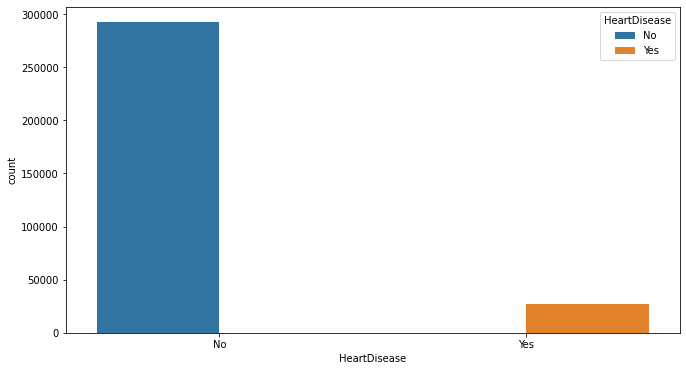

In [236]:

plt.figure(figsize = (11,6))
sns.countplot(x = heart_df['HeartDisease'], hue = 'HeartDisease', data = heart_df)

In [8]:
numeric_features = heart_df.select_dtypes(include=[np.number])

In [9]:
numerical_df = heart_df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease']]

In [10]:
categorical_features= [col for col in heart_df.columns if heart_df[col].dtypes == 'object']

In [11]:
for feature in categorical_features:
    print(feature, ":", heart_df[feature].unique())
    print()

HeartDisease : ['No' 'Yes']

Smoking : ['Yes' 'No']

AlcoholDrinking : ['No' 'Yes']

Stroke : ['No' 'Yes']

DiffWalking : ['No' 'Yes']

Sex : ['Female' 'Male']

AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

PhysicalActivity : ['Yes' 'No']

GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

Asthma : ['Yes' 'No']

KidneyDisease : ['No' 'Yes']

SkinCancer : ['Yes' 'No']



Zero Null values are detected in dataset

In [168]:
heart_df[heart_df.isnull().any(axis=1)]


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


**Distribution of Each Variable**

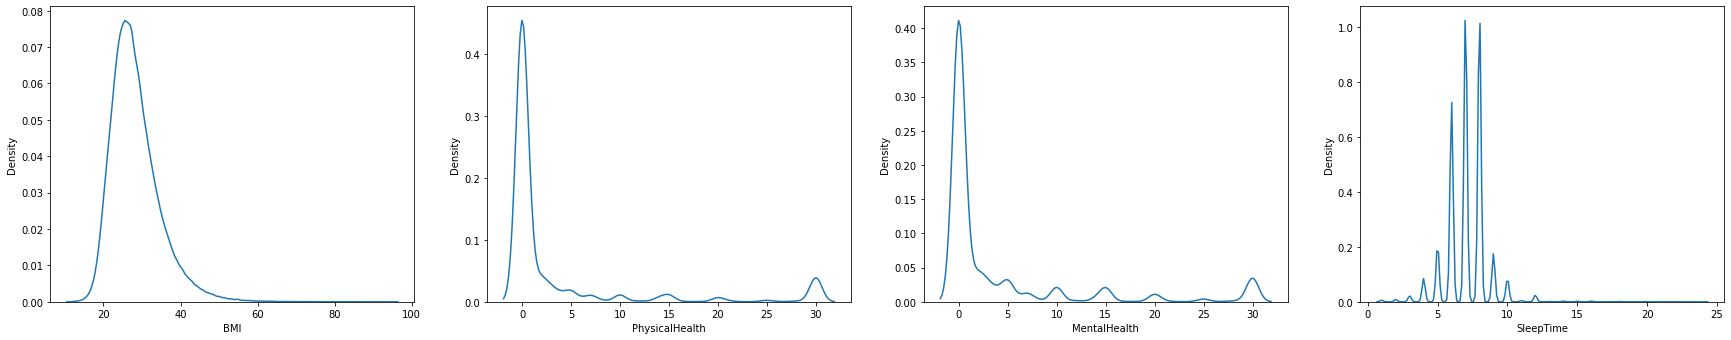

In [261]:
size = 1
plt.figure(figsize = (30,25))
for feature in numeric_features:
    plt.subplot(4,4,size)
    sns.kdeplot(x = feature , data = heart_df)
    size = size+1

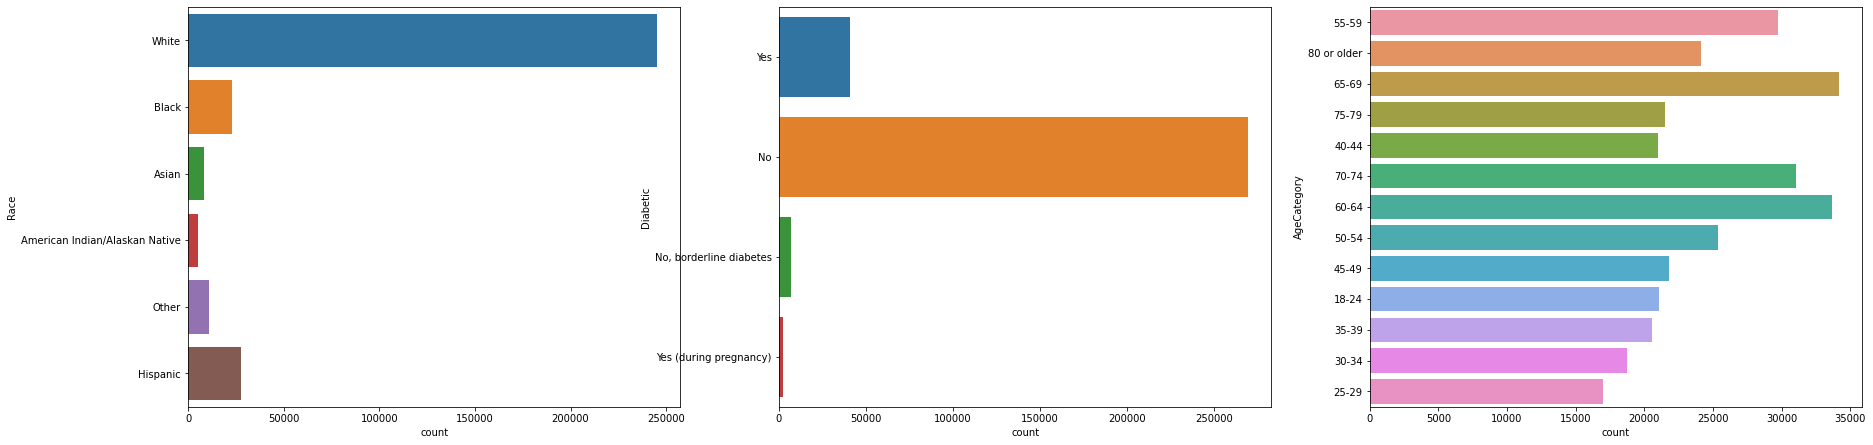

In [258]:
size = 1
plt.figure(figsize = (30,25))
for feature in [ 'Race','Diabetic', 'AgeCategory']:
    plt.subplot(3,3,size)
    sns.countplot(y = feature, data = heart_df)
    size = size+1

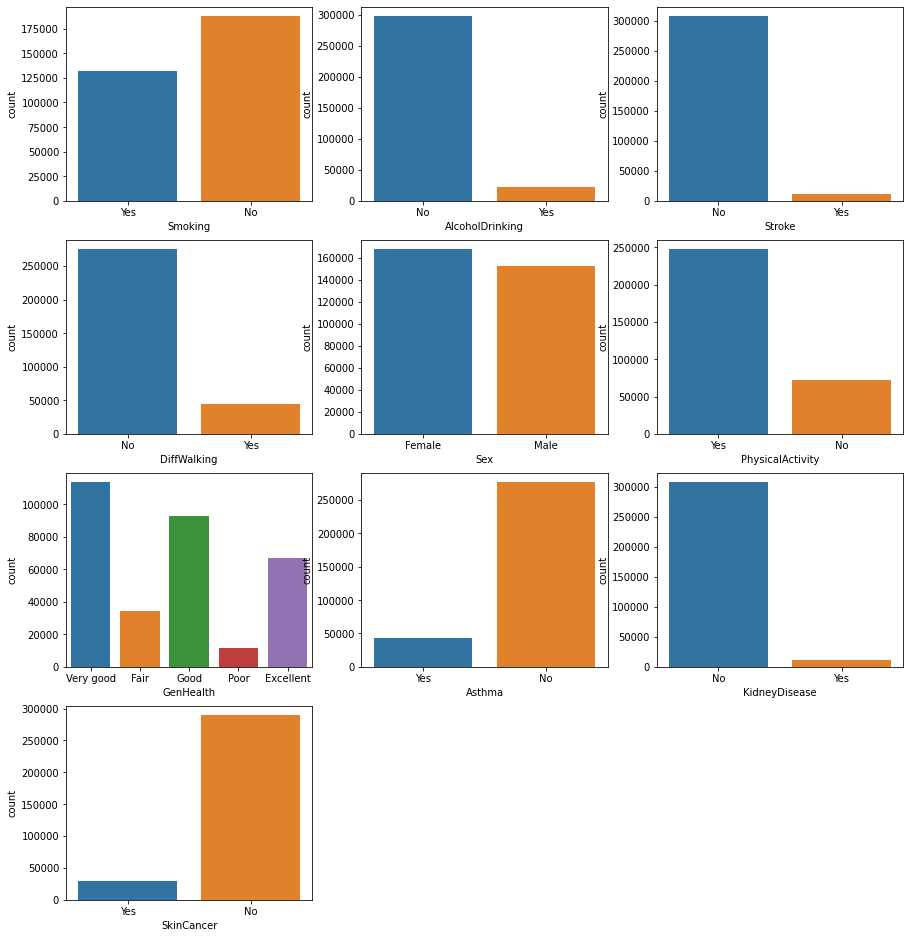

In [244]:
size = 1
plt.figure(figsize = (15,25))
for feature in categorical_features:
  if(not(feature in ['HeartDisease', 'Race','Diabetic', 'AgeCategory'])):
    plt.subplot(6,3,size)
    sns.countplot(x = feature , data = heart_df)
    size = size+1

**Distribution of Numerical Features based on Target Feature**

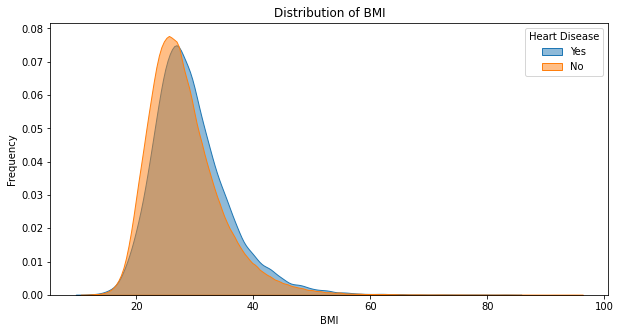

In [175]:
fig, axes = plt.subplots(figsize = (10,5))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["BMI"], alpha=0.5,shade = True, label="Yes", ax = axes)
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='No']["BMI"], alpha=0.5,shade = True, label="No", ax = axes)
plt.title('Distribution of BMI')
axes.set_xlabel("BMI")
axes.set_ylabel("Frequency")
axes.legend(title='Heart Disease')
plt.show()

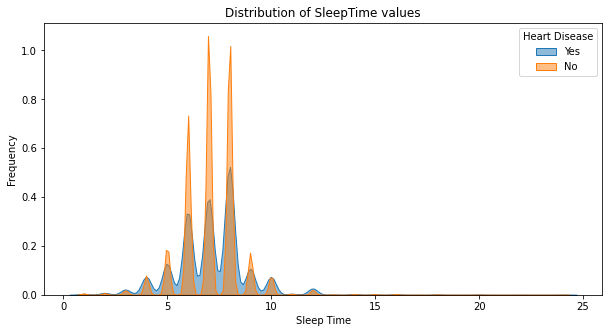

In [174]:
fig, axes = plt.subplots(figsize = (10,5))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, label="Yes", ax = axes)
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, label="No", ax = axes)
plt.title('Distribution of SleepTime values')
axes.set_xlabel("Sleep Time")
axes.set_ylabel("Frequency")
axes.legend(title='Heart Disease')
plt.show()

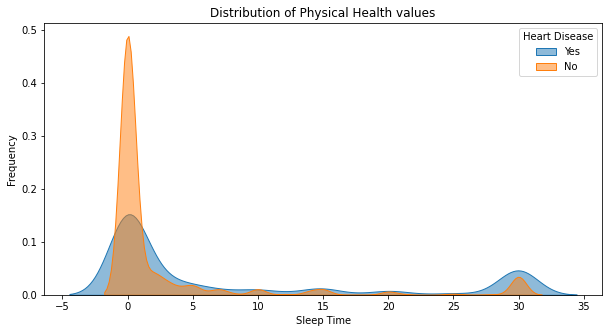

In [173]:
fig, axes = plt.subplots(figsize = (10,5))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, label="Yes", ax = axes)
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, label="No", ax = axes)
plt.title('Distribution of Physical Health values')
axes.set_xlabel("Sleep Time")
axes.set_ylabel("Frequency")
axes.legend(title='Heart Disease')
plt.show()

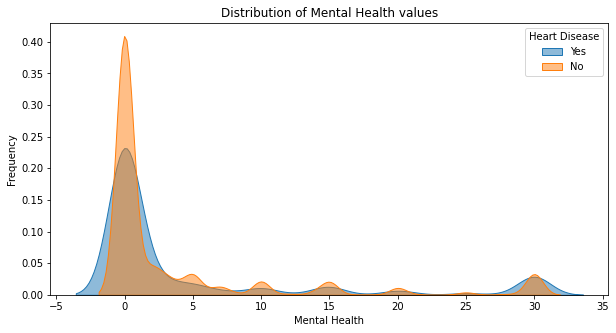

In [172]:
fig, axes = plt.subplots(figsize = (10,5))
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='Yes']["MentalHealth"], alpha=0.5,shade = True,  label="Yes", ax = axes)
sns.kdeplot(heart_df[heart_df["HeartDisease"]=='No']["MentalHealth"], alpha=0.5,shade = True, label="No", ax = axes)
plt.title('Distribution of Mental Health values')
axes.set_xlabel("Mental Health")
axes.set_ylabel("Frequency")
axes.legend(title='Heart Disease')
plt.show()

**Distribution of Categorical Features based on Target Feature**

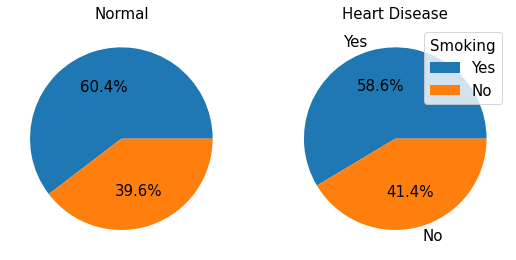

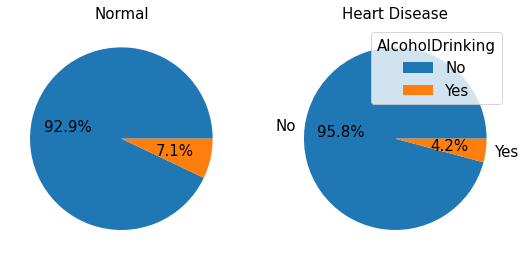

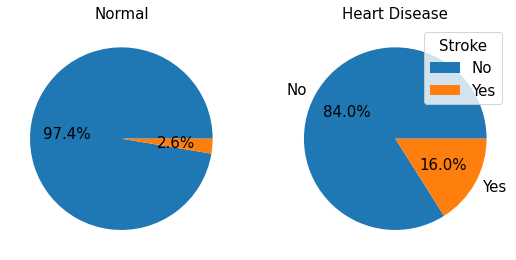

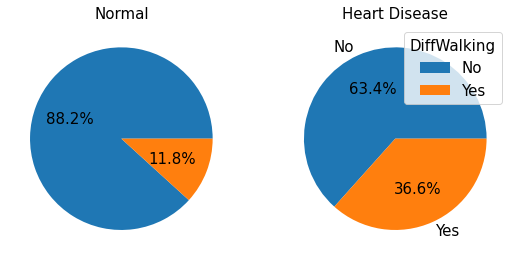

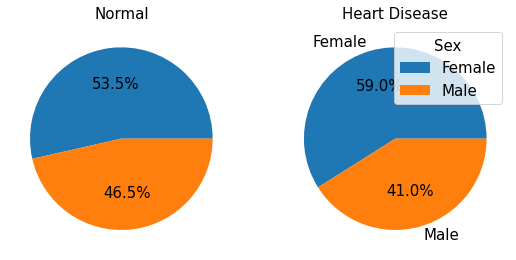

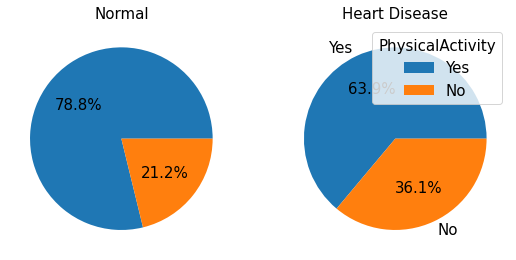

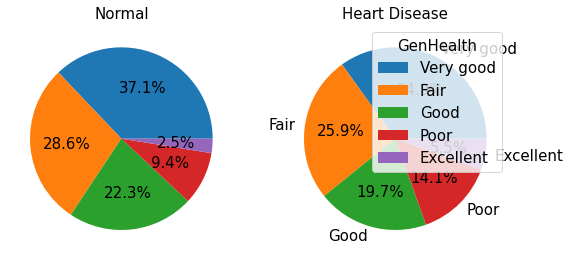

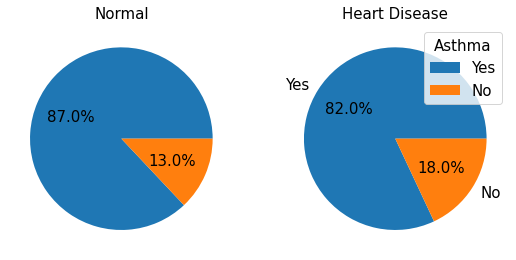

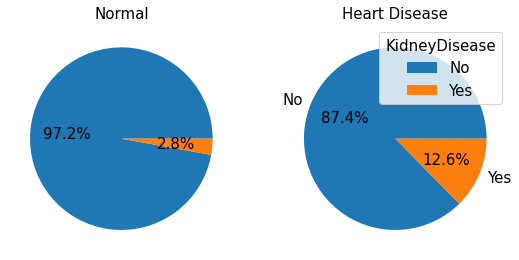

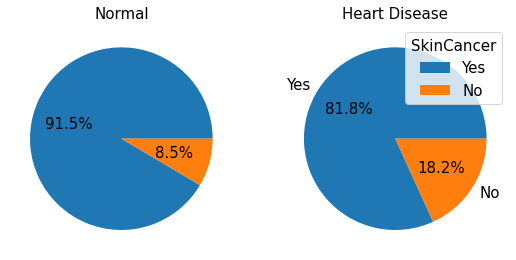

In [43]:
for feature in categorical_features:    
  if (not(feature in ['Race', 'AgeCategory', 'Diabetic', 'HeartDisease'])):
    fig,axes = plt.subplots(1,2,figsize=(9,8))
    labels = heart_df[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(heart_df[heart_df.HeartDisease=="No"][feature].value_counts(),autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('Normal',fontsize=15)
    axes[1].pie(heart_df[heart_df.HeartDisease=="Yes"][feature].value_counts() , labels = labels, autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Heart Disease',fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

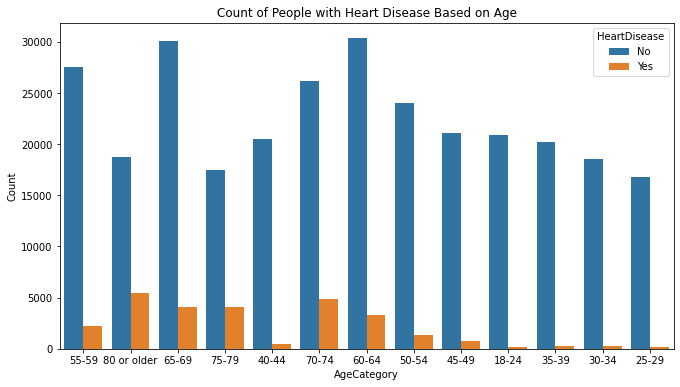

In [176]:
plt.figure(figsize = (11,6))
sns.countplot(x = heart_df['AgeCategory'], hue = 'HeartDisease', data = heart_df)
plt.title("Count of People with Heart Disease Based on Age")
plt.ylabel('Count')
plt.show()


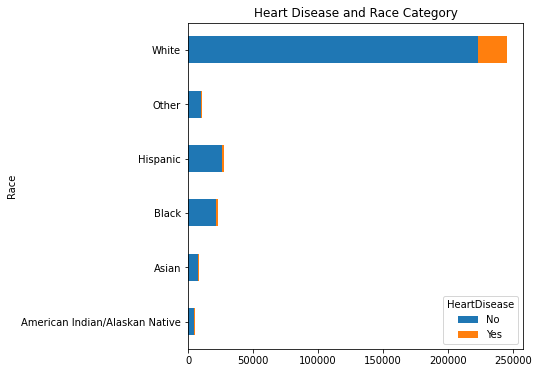

In [177]:

age_h=pd.DataFrame(pd.crosstab(heart_df["Race"],heart_df["HeartDisease"])).reset_index()
ax=age_h.plot(x="Race",kind='barh', stacked=True, title='Heart Disease and Race Category',figsize=(6,6))

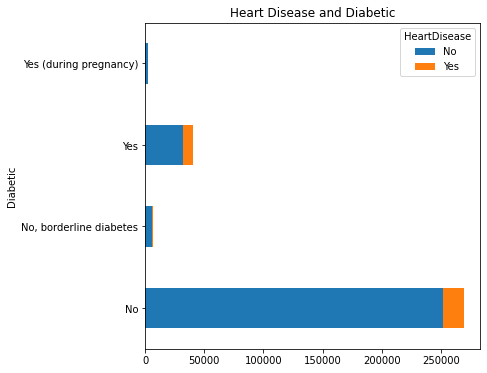

In [178]:
age_h=pd.DataFrame(pd.crosstab(heart_df["Diabetic"],heart_df["HeartDisease"])).reset_index()
ax=age_h.plot(x="Diabetic",kind='barh', stacked=True, title='Heart Disease and Diabetic',figsize=(6,6))

**Aggregate Relationship**

In [164]:
r = heart_df.groupby(['HeartDisease','Stroke'])[['BMI']].aggregate(['median','min','mean'])
r

BMI                  
                    median    min       mean
HeartDisease Stroke                         
No           No      27.25  12.02  28.210930
             Yes     27.60  12.53  28.733646
Yes          No      28.34  12.21  29.410951
             Yes     28.34  12.48  29.352581

<AxesSubplot:ylabel='HeartDisease,Stroke'>

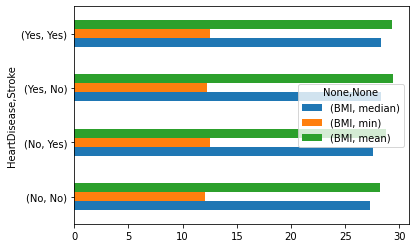

In [165]:
r.plot(kind='barh')

### from the above plot people with BMI value Higher than '28' has high probablity of getting a heart disease and stroke.

In [219]:
r1 = heart_df[heart_df["HeartDisease"]=='Yes'].groupby(['Sex'])[['Smoking']].aggregate(['count'])
r1

,Smoking
,count
Sex,
Female,11234
Male,16139


<AxesSubplot:ylabel='Sex'>

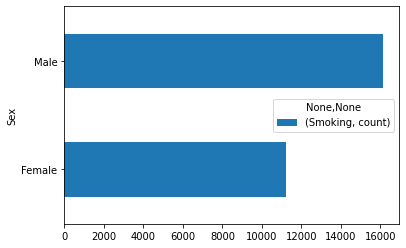

In [221]:
r1.plot(kind='barh')

### From the results male adults who have heart disease smoke more than female peers.


**Analyzing the Distribution of Categorical variables depending on gender**

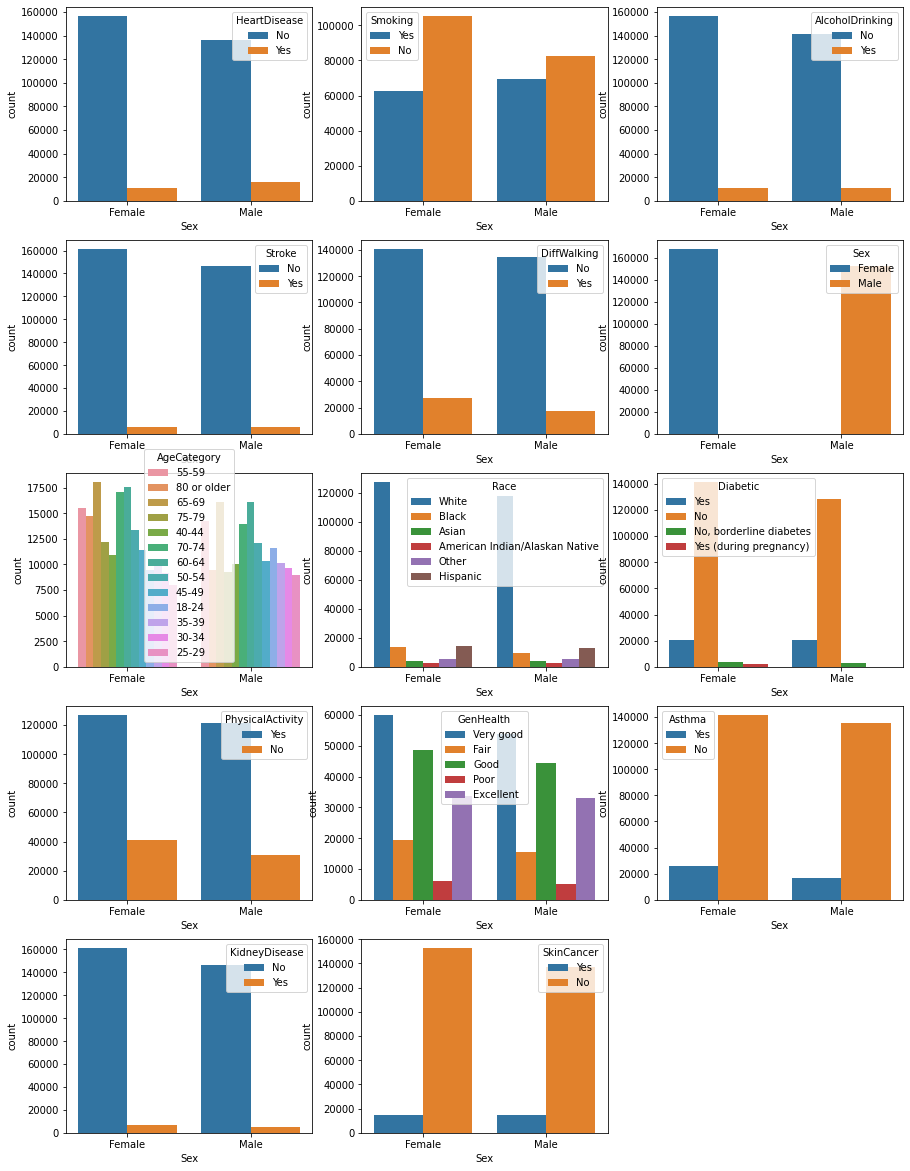

In [21]:
size = 1
plt.figure(figsize = (15,25))
for feature in categorical_features:
    plt.subplot(6,3,size)
    sns.countplot(x = 'Sex',hue = heart_df[feature] , data = heart_df)
    size = size+1

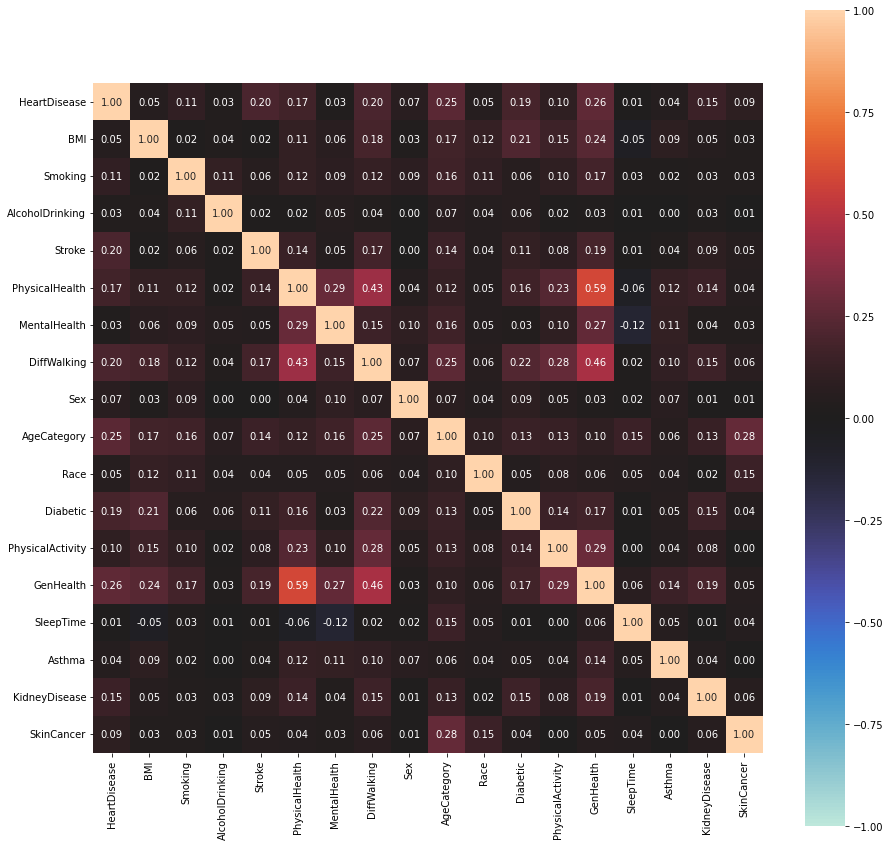

{'ax': <AxesSubplot:>,
 'corr':                   HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
 HeartDisease          1.000000  0.051803  0.107738         0.032009  0.196798   
 BMI                   0.051803  1.000000  0.023118         0.038816  0.019733   
 Smoking               0.107738  0.023118  1.000000         0.111741  0.061184   
 AlcoholDrinking       0.032009  0.038816  0.111741         1.000000  0.019746   
 Stroke                0.196798  0.019733  0.061184         0.019746  1.000000   
 PhysicalHealth        0.170721  0.109788  0.115352         0.017254  0.137014   
 MentalHealth          0.028591  0.064131  0.085157         0.051282  0.046467   
 DiffWalking           0.201234  0.181678  0.120052         0.035265  0.174111   
 Sex                   0.070007  0.026940  0.085028         0.003796  0.002515   
 AgeCategory           0.245588  0.170749  0.164059         0.069702  0.143594   
 Race                  0.051230  0.118244  0.108177         0.04026

In [225]:
associations(heart_df, figsize=(15,15))

# **Summary**

My conclusions after performing basic data analysis on dataset for predicting responsible key-features for having "Heart Disease" are: 

The adults whose age is greater than or euqal to 80 have higher chances of getting a heart disease. In overall Dataset, most people who are diagnosed with heart disease are smokers and in that, percentage of male adults is high. White and Black people seem to have higher chance of getting heart disease. I did not see any relationship between heart disease and people who are Heavy drinkers/ asthma patients. Diabetic adults seem to have more chances of getting heart disease. However, the dataset is highly unbalanced and because of this some conculsions/plots needed to be further investiged and I'm hoping that by applying sampling techinques on dataset we can achieve noticable relationships between some features.